In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from pyparsing import Each

In [2]:
sales_df = pd.DataFrame()

for filename in os.listdir('./Sales_Data'):
    df = pd.read_csv('./Sales_Data/'+filename)
    sales_df = pd.concat([sales_df,df])

In [3]:
sales_df.to_csv('./Output/all_data.csv',index=False)

In [2]:
sales_data = pd.read_csv('./Output/all_data.csv')
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### DATA CLEANING

In [3]:
sales_data['Month'] = sales_data['Order Date'].str[0:2]
type(sales_data.iloc[1].Month)

str

Str no good, month integer good.
butt nan values cant be converter to int so handeling nans first 

In [4]:
print(sales_data['Month'].isna().sum())
for column in sales_data.columns:
    print(column,sales_data[column].isna().sum())

545
Order ID 545
Product 545
Quantity Ordered 545
Price Each 545
Order Date 545
Purchase Address 545
Month 545


In [5]:
nan_df = sales_data[sales_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN


545 rows have no data in them so we can drop them 

In [6]:
s1=sales_data.shape[0]
sales_data = sales_data.dropna()
s2=sales_data.shape[0]
print(s1-s2)

545


dropping rows with or in order data and month

In [7]:
or_index=list(sales_data.loc[sales_data['Month'].str.contains('Or')].index)
sales_data.drop(or_index,axis=0,inplace=True)
sales_data.loc[sales_data['Month']=='Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


now convert month to int

In [8]:
sales_data['Month'] = sales_data['Month'].astype('int32')
print(type(sales_data.iloc[1].Month))

<class 'numpy.int32'>


In [9]:
sales_data.groupby(sales_data['Month'])['Price Each'].sum().sort_values(ascending=False)

Month
2     7003.84389.9914.953.8414.953.8415011.9511.9599...
10    379.99389.992.99149.9911.992.9911.9914.95150.0...
3     2.992.9911.9999.99999.9911.9999.99999.9911.953...
12    1700600.011.95149.9911.953.8411.9511.9599.992....
9     150379.9914.952.99999.99149.9911.9514.9599.991...
7     1503003.843.842.9999.99600600.011.9514.953.841...
5     150149.9970015060011.9515099.9915099.993.84150...
6     149.992.9914.9514.9540011.956003.84109.9999.99...
1     14.9570014.9560011.9915011.9511.9599.9914.9510...
8     11.9999.99700.03.843.8411.99379.99109.9911.991...
11    11.9911.95150.0149.9999.9911.9514.9599.9914.95...
4     11.9599.9960011.9911.9911.9599.9911.95170011.9...
Name: Price Each, dtype: object

hmmm Price each seems to be in string format 

In [10]:
type(sales_data.iloc[1]['Price Each']) 
#conforming 

str

In [11]:
#converting price each to float 
sales_data['Price Each'] = sales_data['Price Each'].astype('float')
print(type(sales_data.iloc[1]['Price Each']))
#converting quantiy to float
sales_data['Quantity Ordered'] = sales_data['Quantity Ordered'].astype('float')
print(type(sales_data.iloc[1]['Price Each']))


<class 'numpy.float64'>
<class 'numpy.float64'>


In [12]:
sales_data['City'] = sales_data['Purchase Address'].apply(lambda x:x.split(',')[1])
sales_data['City'].nunique()

9

In [13]:
sales_data['State'] = sales_data['Purchase Address'].apply(lambda x:x.split(',')[2].split(' ')[1])

In [14]:
sales_data['State'].unique()

array(['NY', 'CA', 'GA', 'OR', 'TX', 'MA', 'ME', 'WA'], dtype=object)

##### normalize purchase time 

In [15]:
sales_data['Time']= sales_data['Order Date'].apply(lambda x:x.split(' ')[1])
sales_data['Time']= sales_data['Time'].apply(lambda x:x.split(':')[0])
sales_data.head(5)['Time']

0    00
1    07
2    18
3    15
4    12
Name: Time, dtype: object

In [16]:

sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Time
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,New York City,NY,00
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,New York City,NY,07
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,New York City,NY,18
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,San Francisco,CA,15
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,Atlanta,GA,12


### Best month for sales 

In [17]:
sales_data['Total Sales'] = sales_data['Price Each']*sales_data['Quantity Ordered']
print(sales_data.iloc[0:5]['Total Sales'])

0    1700.00
1     600.00
2      11.95
3     149.99
4      11.95
Name: Total Sales, dtype: float64


In [18]:
sales_data.groupby(sales_data['Month'])['Total Sales'].sum().sort_values(ascending=False)

Month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Total Sales, dtype: float64

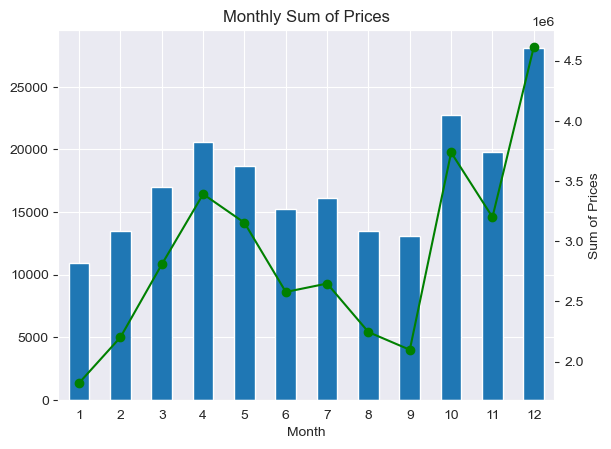

In [19]:
monthly_sum = sales_data.groupby(sales_data['Month'])['Total Sales'].sum()
monthly_quantity = sales_data.groupby(sales_data['Month'])['Quantity Ordered'].sum()
ax =monthly_quantity.plot(kind='bar', legend=False)
monthly_sum.index = monthly_sum.index - 1
monthly_sum.plot(kind='line', marker='o', secondary_y=True, ax=ax, 
                      color='green', legend=False)

plt.xlabel('Month')

plt.ylabel('Sum of Prices')
plt.title('Monthly Sum of Prices')
plt.show()


### City with best sales 

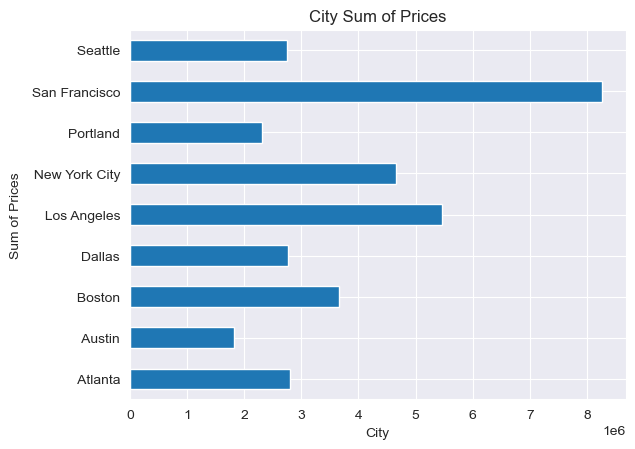

In [20]:
city_sales = sales_data.groupby(sales_data['City'])['Total Sales'].sum()
city_sales.plot(kind='barh', legend=False)
plt.xlabel('City')
plt.ylabel('Sum of Prices')
plt.title('City Sum of Prices')
plt.show()

##### maybe check for duplicates in city name but at different states 

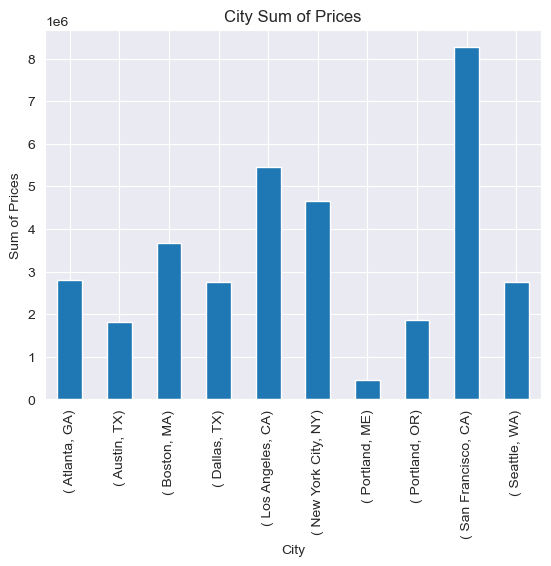

In [21]:
city_sales = sales_data.groupby([sales_data['City'],sales_data['State']])['Total Sales'].sum()
city_sales.plot(kind='bar', legend=False)
plt.xlabel('City')
plt.ylabel('Sum of Prices')
plt.title('City Sum of Prices')
plt.show()

 ### Best month for each city 

In [22]:
city_month = sales_data.groupby([sales_data["City"],sales_data["Month"]])['Total Sales'].sum().reset_index()

In [23]:
city_max = city_month.groupby('City')['Total Sales'].idxmax()

In [24]:
best_month_sales = city_month.loc[city_max]

In [25]:
print(best_month_sales)

               City  Month  Total Sales
11          Atlanta     12    360899.26
23           Austin     12    233777.09
35           Boston     12    509599.16
47           Dallas     12    380718.85
59      Los Angeles     12    684044.84
71    New York City     12    646770.83
83         Portland     12    303714.11
95    San Francisco     12   1106601.27
107         Seattle     12    387317.93


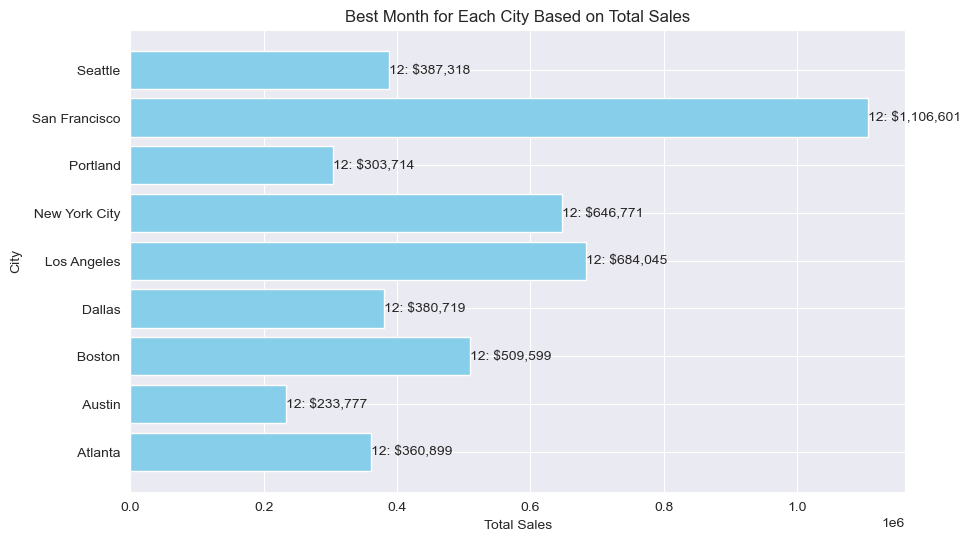

In [26]:
city_monthly_sales = sales_data.groupby(['City', 'Month'])['Total Sales'].sum().reset_index()

max_sales_index = city_monthly_sales.groupby('City')['Total Sales'].idxmax()

best_month_sales = city_monthly_sales.loc[max_sales_index]

plt.figure(figsize=(10, 6))

plt.barh(best_month_sales['City'], best_month_sales['Total Sales'], color='skyblue')
for i, (city, sales, month) in enumerate(zip(best_month_sales['City'], best_month_sales['Total Sales'], best_month_sales['Month'])):
    plt.text(sales, i, f'{month}: ${sales:,.0f}', ha='left', va='center', fontsize=10)
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.title('Best Month for Each City Based on Total Sales')

plt.show()

### Best time to display ads

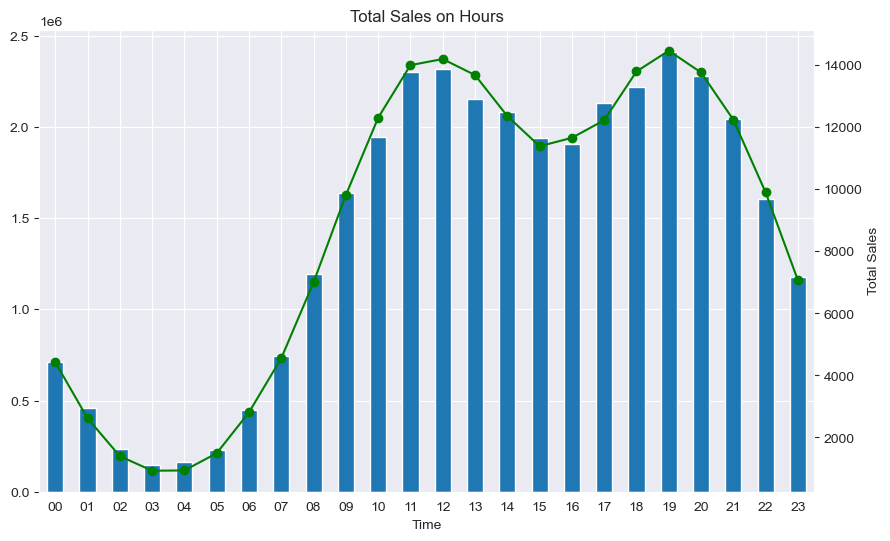

In [27]:
sales_on_hour = sales_data.groupby(sales_data['Time'])['Total Sales'].sum()
quantity_on_hour = sales_data.groupby(sales_data['Time'])['Quantity Ordered'].sum()
ax = sales_on_hour.plot(kind='bar', legend=False, figsize=(10, 6))
quantity_on_hour.plot(kind='line',marker='o', secondary_y=True, ax=ax, color='green', legend=False)
plt.xlabel('Hours')
plt.xticks(rotation=0)
plt.ylabel('Total Sales')
plt.title('Total Sales on Hours')
plt.show()

### Statistical analysis 

In [28]:
print('average sale price',sales_data['Total Sales'].mean())
print('average quantity ',sales_data['Quantity Ordered'].mean())


average sale price 185.490916751815
average quantity  1.1243828986286637


In [29]:
sales_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Time,Total Sales
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,New York City,NY,00,1700.00
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,New York City,NY,07,600.00
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,New York City,NY,18,11.95
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,San Francisco,CA,15,149.99
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,Atlanta,GA,12,11.95


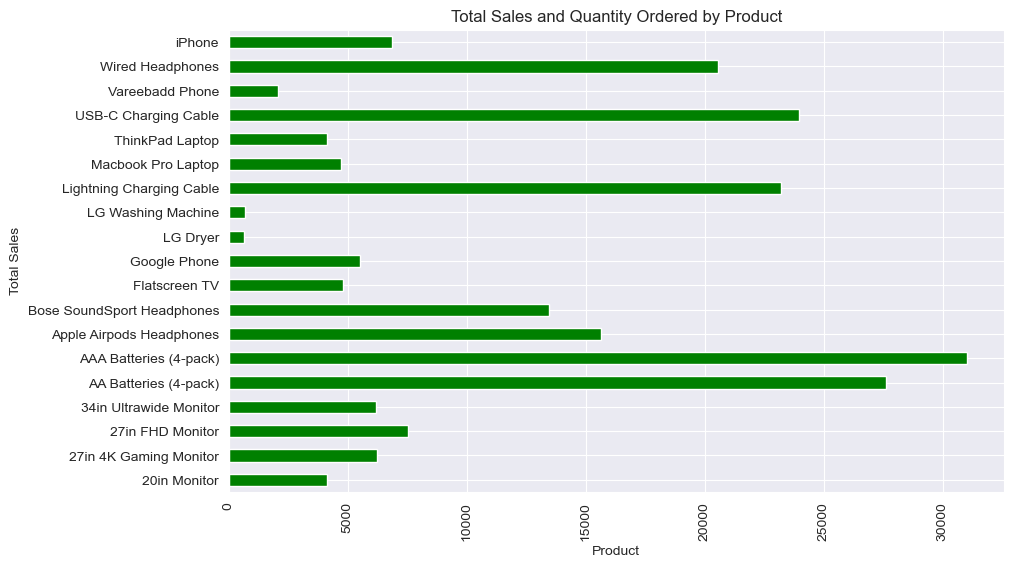

In [31]:
import matplotlib.pyplot as plt

# Grouping data
Product_price = sales_data.groupby(sales_data['Product'])['Total Sales'].sum()
Product_quantity = sales_data.groupby(sales_data['Product'])['Quantity Ordered'].sum()

# Create index for products
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot total sales as horizontal bar chart
# Plot quantity ordered as line chart on the same axis
Product_quantity.plot(kind='barh',  ax=ax, color='green',label='Quantity Ordered')

# Create custom legend labels

# Setting labels and title
plt.xlabel('Product')
plt.xticks(rotation=90)
plt.ylabel('Total Sales')
plt.title('Total Sales and Quantity Ordered by Product')

# Add legend to the side with custom labels

# Show plot
plt.show()



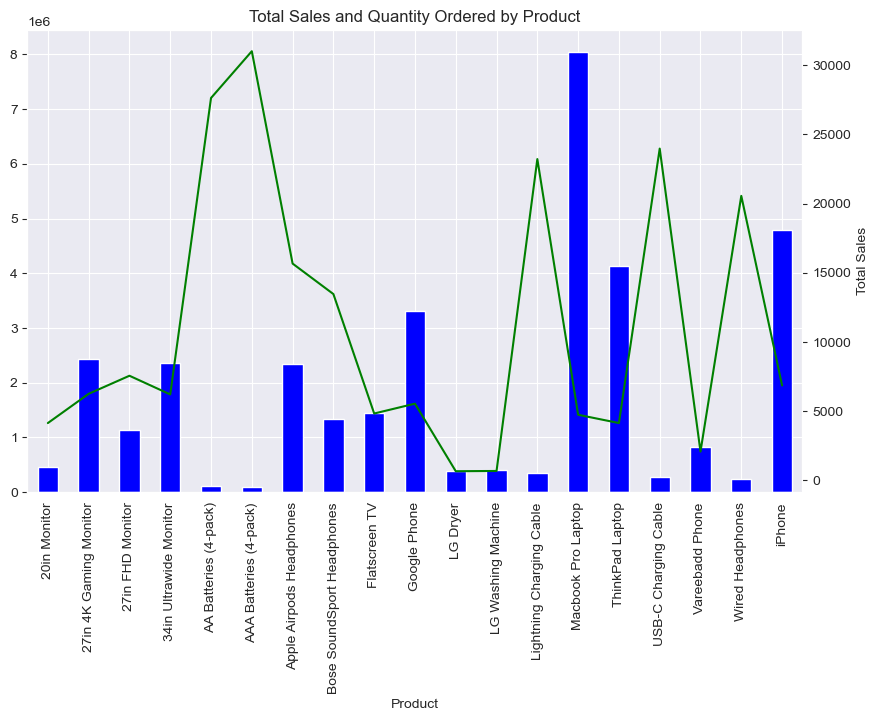

In [33]:
import matplotlib.pyplot as plt

# Grouping data
Product_price = sales_data.groupby(sales_data['Product'])['Total Sales'].sum()
Product_quantity = sales_data.groupby(sales_data['Product'])['Quantity Ordered'].sum()

# Create index for products
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax2 = ax.twinx()
# Plot total sales as horizontal bar chart
Product_price.plot(kind='bar', ax=ax, color='blue', label='Quantity Ordered',sharex=True)
# Plot quantity ordered as line chart on the same axis
Product_quantity.plot(kind='line',  ax=ax2, color='green',label='Quantity Ordered', secondary_y=True,sharex=True)


# Create custom legend labels

# Setting labels and title
plt.xlabel('Product')
plt.xticks(rotation=0)
plt.ylabel('Total Sales')
plt.title('Total Sales and Quantity Ordered by Product')

# Add legend to the side with custom labels

# Show plot
plt.show()



In [34]:
multiple_products = sales_data[sales_data['Order ID'].duplicated(keep=False)]

In [68]:
max_sale_id = sales_data['Total Sales'].idxmax()
max_sale_order_id = sales_data.loc[max_sale_id, 'Order ID']
max_sale_order_row = sales_data[sales_data['Order ID'] == max_sale_order_id]
max_sale_order_row

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Time,Total Sales
29834,181069,Macbook Pro Laptop,2.0,1700.00,04/27/19 21:01,"668 Park St, San Francisco, CA 94016",4,San Francisco,CA,21,3400.00
29835,181069,34in Ultrawide Monitor,1.0,379.99,04/27/19 21:01,"668 Park St, San Francisco, CA 94016",4,San Francisco,CA,21,379.99


In [38]:



sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Time,Total Sales
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,New York City,NY,00,1700.00
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,New York City,NY,07,600.00
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,New York City,NY,18,11.95
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,San Francisco,CA,15,149.99
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,Atlanta,GA,12,11.95
...,...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1.0,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,Boston,MA,19,2.99
186846,222906,27in FHD Monitor,1.0,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,New York City,NY,19,149.99
186847,222907,USB-C Charging Cable,1.0,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,San Francisco,CA,18,11.95
186848,222908,USB-C Charging Cable,1.0,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,San Francisco,CA,18,11.95


In [56]:
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Time,Total Sales
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,New York City,NY,00,1700.00
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,New York City,NY,07,600.00
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,New York City,NY,18,11.95
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,San Francisco,CA,15,149.99
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,Atlanta,GA,12,11.95
...,...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1.0,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,Boston,MA,19,2.99
186846,222906,27in FHD Monitor,1.0,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,New York City,NY,19,149.99
186847,222907,USB-C Charging Cable,1.0,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,San Francisco,CA,18,11.95
186848,222908,USB-C Charging Cable,1.0,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,San Francisco,CA,18,11.95
